In [1]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objects as go

#import plotly.express as px

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import tqdm
#from functools import lru_cache
#import re
import networkx as nx
#from networkx.algorithms import approximation

import MDAnalysis as mda

#import scipy
#import sklearn
#import skimage

#import xml.etree.ElementTree as et
#from Bio.PDB import *
#import nglview as nv

from timeit import default_timer as timer

import sys
import os

# http://nglviewer.org/nglview/latest/api.html
# https://biopython.org/wiki/The_Biopython_Structural_Bioinformatics_FAQ
# https://ambermd.org/tutorials/analysis/tutorial_notebooks/nglview_notebook/index.html
# https://amber-md.github.io/pytraj/latest/_api/pytraj.html

In [23]:
# Laptop
#aminoacids_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.2_aminoacids.itp'
#solvents_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.0_solvents.itp'
#ions_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.0_ions.itp'
#water_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.2.itp'
#sugars_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/05-2020/martini_v2.0_sugars.itp'

#Trajectory

#contact_matrix = np.loadtxt('/home/lillo/TesiCNTE/CNTE/dataset/contact_matrix.txt')   #laptop
#contact_matrix = np.loadtxt('/home/lillo/Code/Tesi/dataset/contact_matrix.txt')        #fisso
#contact_matrix_single = contact_matrix.reshape(100,100,12,12)

#gromacs_output = open('/home/lillo/Code/Tesi/dataset/dm4500Compl_mix1_K2_1%4500ns.gro') #fisso
#gromacs_output = open('/home/lillo/TesiCNTE/CNTE/dataset/dm4500Compl_mix1_K2_1%4500ns.gro') #laptop

#path = '/home/lillo/Code/Tesi/dataset/dm4500Compl_mix1_K2_1%4500ns.gro' #fisso
#path = '/home/lillo/TesiCNTE/CNTE/dataset/dm4500Compl_mix1_K2_1%4500ns.gro' #laptop

# import 2mxu file (beta sheet)

#path_to_mmCIF = open('/home/lillo/TesiCNTE/pdb/2mxu/2mxu.cif')  ## laptop
#path_to_pdb = '/home/lillo/TesiCNTE/pdb/2mxu/2mxu.pdb'  ## laptop
#pa_to_pdb = '/home/lillo/TesiCNTE/pdb/2mxu/2mxu.pdb'  ## laptop

#path_to_mmCIF = open('/home/lillo/Code/Tesi/pdb/2mxu/2mxu.cif')  ## fisso
#path_to_pdb = '/home/lillo/Code/Tesi/pdb/2mxu/2mxu.pdb'  ## fisso
#pa_to_pdb = '/home/lillo/Code/Tesi/pdb/2mxu/2mxu.pdb'  ## fisso

#seed_1_path = '/home/lillo/TesiCNTE/from_cluster/aggregate1.gro' # laptop
#seed_1_path = '/home/lillo/Code/Tesi/dataset/aggregate1.gro'    # Fisso

#prod_gro = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part1/min.gro'            # laptop
#prod_xtc = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part1/prod.xtc'           # laptop
#prod1_xtc = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part2/prod-compl.xtc'    # laptop

prod_gro = '/run/media/lillo/Archivio/from_linux/Code/Tesi/dataset/prod/prod_part1/min.gro'           #fisso
prod_xtc = '/run/media/lillo/Archivio/from_linux/Code/Tesi/dataset/prod/prod_part1/prod.xtc'          #fisso
prod1_xtc = '/run/media/lillo/Archivio/from_linux/Code/Tesi/dataset/prod/prod_part2/prod-compl.xtc'   #fisso


#trj_xtc = '/home/lillo/TesiCNTE/CNTE/trajectory/prd-LDLK12-100mer-out-mol.xtc'  #laptop
#trj_gro = '/home/lillo/TesiCNTE/CNTE/trajectory/min-LDLK12-100mer-out-c.gro'    #laptop

trj_gro = '/run/media/lillo/Archivio/from_linux/Code/Tesi/dataset/trajectory_6_12_19/min-LDLK12-100mer-out-c.gro'     #fisso
trj_xtc = '/run/media/lillo/Archivio/from_linux/Code/Tesi/dataset/trajectory_6_12_19/prd-LDLK12-100mer-out-mol.xtc'   #fisso

#lipase = '/home/lillo/Documenti/PDB/lipase/3d2c.pdb'
#lipase1 = '/home/lillo/Documenti/PDB/lipase/1gpl.pdb'

glico_6bis_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-gluc/eq-2-out.gro'
glico_6bis_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-gluc/production/prd-6bis-GLUC-40mer-3per-out.trr'
glico_6bis_tpr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-gluc/production/prd-6bis-GLUC-40mer-3per.tpr'

#glico_6bis_gro = '/home/lillo/Documenti/Tesi_CNTE/data/glicosilati_6bis/6bis-gluc/eq-2-out.gro'
#glico_6bis_trr = '/home/lillo/Documenti/Tesi_CNTE/data/glicosilati_6bis/6bis-gluc/production/prd-6bis-GLUC-40mer-3per-out.trr'
#glico_6bis_tpr = '/home/lillo/Documenti/Tesi_CNTE/data/glicosilati_6bis/6bis-gluc/production/prd-6bis-GLUC-40mer-3per.tpr'

#p73_2per_wat_seed_1_gro = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.gro'     # laptop
#p73_2per_wat_seed_1_xtc = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.xtc'     # laptop
#p73_2per_wat_seed_1_trr = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.trr'     # laptop

### LAPTOP GLICOSILATI
#glac_1perc_1_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/1perc/6bis-GLAC-1p/equilibration-2/eq-2-out.gro'
#glac_1perc_1_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/1perc/6bis-GLAC-1p/production/prd-6bis-GLAC-13mer-1per-out.trr'

#glac_1perc_2_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/1perc/6bis-GLAC-1p-2/equilibration-2/eq-2-out.gro'
#glac_1perc_2_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/1perc/6bis-GLAC-1p-2/production/prd-6bis-GLAC-13mer-1per-2-out.trr'

#glac_1perc_3_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/1perc/6bis-GLAC-1p-3/equilibration-2/eq-2-out.gro'
#glac_1perc_3_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/1perc/6bis-GLAC-1p-3/production/prd-6bis-GLAC-13mer-1per-3-out.trr'

#glac_3perc_1_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC/equilibration-2/eq-2-out.gro'
#glac_3perc_1_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC/production/prd-6bis-GLAC-40mer-3per-out.trr'

#glac_3perc_2_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC-2/equilibration-2/eq-2-out.gro'
#glac_3perc_2_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC-2/production/prd-6bis-40mer-3per-out.trr'

#glac_3perc_3_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC-3/equilibration-2/eq-2-out.gro'
#glac_3perc_3_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC-3/production/prd-6bis-GLAC-40mer-3per-out.trr'


### FISSO GLICOSILATI
glac_3perc_1_gro = '/run/media/lillo/Archivio/Dataset/CNTE/6bis-GlAC/3perc/6bis-GLAC/equilibration-2/eq-2-out.gro'
glac_3perc_1_trr = '/run/media/lillo/Archivio/Dataset/CNTE/6bis-GlAC/3perc/6bis-GLAC/production/prd-6bis-GLAC-40mer-3per-out.trr'

glac_3perc_2_gro = '/run/media/lillo/Archivio/Dataset/CNTE/6bis-GlAC/3perc/6bis-GLAC-2/equilibration-2/eq-2-out.gro'
glac_3perc_2_trr = '/run/media/lillo/Archivio/Dataset/CNTE/6bis-GlAC/3perc/6bis-GLAC-2/production/prd-6bis-40mer-3per-out.trr'

glac_3perc_3_gro = '/run/media/lillo/Archivio/Dataset/CNTE/6bis-GlAC/3perc/6bis-GLAC-3/equilibration-2/eq-2-out.gro'
glac_3perc_3_trr = '/run/media/lillo/Archivio/Dataset/CNTE/6bis-GlAC/3perc/6bis-GLAC-3/production/prd-6bis-GLAC-40mer-3per-out.trr'


In [3]:
import torch

In [4]:
torch.cuda.is_available()

True

In [5]:
import morphoscanner

In [ ]:
### Mi serve un oggetto peptide con sequenza ed atom_number.
### La sequenza la prendo una volta sola e sarà sempre la stessa
### L'atom_number mi serve perché così posso prendermi le coordinate
### dai timestep quando voglio, anche per singolo peptide.

In [ ]:
#plot from trajectory positions  ### WORKING BUT YOU NEED TO:
# make_universe
# positions = universe.select_atoms('name BB').positions
def plot_peptide_from_trajectory_frame(positions, peptide_list=None, centroid=False):
    
    '''
    Plot atoms from universe.trajectory[frame]
    '''
       
    if peptide_list == None:
        
        peptide_list = [e for e in range(len(positions))]

    x = []
    y = []
    z = []

    for peptide in range(len(peptide_list)):
        x.append([peptide])
        y.append([peptide])
        z.append([peptide])

        point = positions[peptide_list[peptide]]
        #print(peptide, point)
        x[peptide].append(point[0])
        y[peptide].append(point[1])
        z[peptide].append(point[2])

        del x[peptide][0]
        del y[peptide][0]
        del z[peptide][0]

    fig = plt.figure()

    ax = plt.axes(projection='3d')

    for pep in range(len(x)):

        # scatter points, making list from torch tensor item
        ax.scatter3D([e.item() for e in x[pep]],[e.item() for e in y[pep]],[e.item() for e in z[pep]])

    return plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as px 
import plotly.graph_objects as go

def plot_protein(coordinate_dict):
    x = []
    y = []
    z = []

    for residue in coordinate_dict:
        point = coordinate_dict[residue]
        x.append(point[0])
        y.append(point[1])
        z.append(point[2])


    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)

    fig = go.Figure(data = [go.Scatter3d (x = x, y = y, z= z)])
    return fig.show()

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap = 'viridis', interpolation = 'nearest')
    plt.colorbar()
    return plt.show()

def get_euclidean_distance(point_1, point_2):

    euclidean_distance = np.sqrt(np.sum([((point_1[0] - point_2[0])**2), ((point_1[1] - point_2[1])**2), ((point_1[2] - point_2[2])**2)]))

    return euclidean_distance

def compute_distance_map(coordinate_dict):
    i = 0
    distance_map = np.zeros((len(coordinate_dict),len(coordinate_dict)))
    for  i  in range(i, len(coordinate_dict)-1):
        coordinate_1 = coordinate_dict[i] 
        for j in range(0, len(coordinate_dict)-1):
            coordinate_2 = coordinate_dict[j]
            euclidean_distance = get_euclidean_distance(coordinate_1, coordinate_2)
            distance_map[i][j] = euclidean_distance
            distance_map[j][i] = euclidean_distance
    return distance_map

def contact_map_helix(distance_map):
    contact_map = np.zeros((len(distance_map),len(distance_map)))
    for i in range(1, len(distance_map)-1):
        for j in range(1, len(distance_map)-1):
            if 0.45 < distance_map[i][j] < 0.46:
                contact_map[i][j] = 1
            elif 0.52 < distance_map[i][j] < 0.56:
                contact_map[i][j] = 2
    return contact_map

            
    
    
    
    
    

In [ ]:
import os
import multiprocessing
from multiprocessing import Pool

#multiprocessing.cpu_count()
available_cpu = len(os.sched_getaffinity(0))

In [ ]:
"""
@author: lillo
"""
import numpy as np
import torch

def get_coordinate_from_pdb(file):
    '''
    Parse a pdb file. Support single chain and multiple chain

    Parameters
    ----------
    file : str
        The path of the .pdb file in your system.

    Returns
    -------
    coordinate_dict : dict
        A dict of dict with the coordinate of each atom of the pdb file.
        
        Depending on the input file it has different levels of nesting:
            
            for single chain:
                atom_index : [x,y,z]
                
            for multiple chain:
                
                chain_index : {atom index : [x,y,z]}
    '''
    
    with open(file) as pdbfile:

        coordinate_dict = {}
        atom_count_dict = {}
        start = 0

        for line in pdbfile:
            
            # split line
            splitted_line = [line[:6], line[6:11], line[12:16], line[17:20], line[21], line[22:26], line[30:38], line[38:46], line[46:54]]
            # get line header
            line_id = splitted_line[0].split()[0]
            
            #check for atom and heteroatom
            if line_id in {'ATOM', 'HETATM'}:
                
                # get CA atom only
                if splitted_line[2].split()[0] in {'CA'}:
                    
                    # get atom num for indexing
                    atom_num = int(splitted_line[5])
                    # get protein chain for indexing
                    chain = splitted_line[4]
                    # get coordinates
                    x, y, z = float(splitted_line[6]), float(splitted_line[7]), float(splitted_line[8])
                    
                    # check if actual chain already has an entry in coordinate_dict
                    if chain not in coordinate_dict.keys():
                        
                        # index from 'start'
                        atom_count_dict[chain] = start
                        # create key for new chain
                        coordinate_dict[chain] = {}
                        # put actual atom coordinates in coordinate_dict
                        coordinate_dict[chain][atom_count_dict[chain]] = np.array([x,y,z])
                    # if actual chain already in coordinate_dict
                    else:
                        # move index forward
                        atom_count_dict[chain] += 1
                        # add the atom coordinates
                        coordinate_dict[chain][atom_count_dict[chain]] = np.array([x,y,z])

    # if there is only one chain, flat the dict
    if len(coordinate_dict) == 1:
        coordinate_dict = coordinate_dict.get([k for k in coordinate_dict][0])

    return coordinate_dict


def get_coordinate_tensor_from_dict(coordinate_dict, device='cuda'):
    '''
        Convert a coordinate_dict to a torch.tensor, for parallel euclidean distance calculation.
        Works on dict in the form {atom_key : [x, y, z]}

    Parameters
    ----------
    coordinate_dict : dict
        Is the coordinate_dict in the form {key : [x, y, z]}.
        It also works for N-dimensional points.

    Returns
    -------
    zero : torch.tensor
        Returns a torch.tensor of shape n x m
        'n'  are the keys in coordinate_dict al len(coordinate_dict)
        'm' is the number of dimensions of your data points
        
        It save on gpu if torch.cuda.is_available(), else on cpu
        If you want to move your data on cpu, e.g. for visualization,
        you need to output_tensor.cpu()
    '''
    

    #variables with dict dimension
    dim0 = len(coordinate_dict)
    first_key = [k for k in coordinate_dict.keys()][0]
    dim1 = len(coordinate_dict[first_key])

    #initialize a 0s tensor
    #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    zero = torch.zeros([dim0,dim1], dtype=torch.float32, device=device)

    for index, peptide in enumerate(coordinate_dict):
            
        zero[index] = torch.tensor(coordinate_dict[peptide], device=device)
                
    return zero


def get_tensors_from_multichain_dict(coordinate_dict):
    '''
    Generate tensor from multichain coordinate dict.
    Your coordinate_dict is in the form:
        
        {chain : {atom : [x, y, z] }}

    Parameters
    ----------
    coordinate_dict : dict
        Your coordinate_dict.
        It is in the form:
        {chain : {atom : [x, y, z] }}.

    Returns
    -------
    tensor_dict : dict
        It is a dict of tensor, one tensor per chain.

    '''
    tensor_dict = {}
    for chain in coordinate_dict:
        tensor_dict[chain] = get_coordinate_tensor_from_dict(coordinate_dict[chain])
    return tensor_dict


def distance_matrix_from_2d_tensor(peptide1_tensor, peptide2_tensor=None, device='cpu'):
    '''
    Minimal function to calculate euclidean distance between two set of points
    using quadratic expansion. Thanks to:
            https://discuss.pytorch.org/t/efficient-distance-matrix-computation/9065
            https://github.com/pytorch/pytorch/pull/25799
            https://github.com/pytorch/pytorch/issues/15253
    

    Parameters
    ----------
    peptide1_tensor : torch.tensor
        torch.tensor of shape n x d.
        
    peptide2_tensor : torch.tensor, optional
        The default is None.
        torch.tensor for which you want to calculate te distance from peptide1_tensor
        shape m x p
        
    device : str, optional
        Options: 'cpu', 'cuda'
        The default is 'cpu'.
        
        Is the device on which to compute the calculation.
        You can set it to 'cuda' if you have an Nvidia GPU and CUDA driver installed.
        
        'cuda' will move the data in the GPU memory, so you have to use data.cpu() to move
        data back to system memory. data in system memory are needed to plot data

    Returns
    -------
    distance_map : torch.tensor
        shape n x p
        tensor with the distances data

    '''
    

    if peptide2_tensor == None:
        peptide2_tensor = peptide1_tensor

    # calculate distance
    x_norm = torch.pow(peptide1_tensor, 2).sum(1).view(-1,1)
    y_t = torch.transpose(peptide2_tensor, 0, 1)
    y_norm = torch.pow(peptide2_tensor, 2).sum(1).view(1,-1)
    
    distance_map = torch.sqrt(x_norm + y_norm - 2.0 * torch.mm(peptide1_tensor, y_t))
    
    # convert nan to 0  (using this instead of torch.clamp())       
    distance_map[torch.isnan(distance_map)] = 0
    
    # if you are calculating pointwise distance a single tensor
    # main diagonal is 0, to fix stability errors
    if peptide1_tensor is peptide2_tensor:
        distance_map = distance_map.fill_diagonal_(0)
    
    return distance_map


In [ ]:
## This works if i multiply a tensor with a matrix
def fast_cdist(x1, x2):
    adjustment = x1.mean(-2, keepdim=True)
    x1 = x1 - adjustment
    x2 = x2 - adjustment  # x1 and x2 should be identical in all dims except -2 at this point

    # Compute squared distance matrix using quadratic expansion
    # But be clever and do it with a single matmul call
    x1_norm = x1.pow(2).sum(dim=-1, keepdim=True)
    x1_pad = torch.ones_like(x1_norm)
    x2_norm = x2.pow(2).sum(dim=-1, keepdim=True)
    x2_pad = torch.ones_like(x2_norm)
    x1_ = torch.cat([-2. * x1, x1_norm, x1_pad], dim=-1)
    x2_ = torch.cat([x2, x2_pad, x2_norm], dim=-1)
    res = x1_.matmul(x2_.transpose(-2, -1))

    # Zero out negative values
    #res.clamp_min_(1e-30).sqrt_()
    res = res.sqrt()
    res[torch.isnan(res)]=0
    return res

In [ ]:
# cosa voglio?
# voglio fare in modo di accellerare la computazione delle distanze anche tra peptidi di dimensione diversa
# utilizzando operazioni tra tensori per parallelizzare i calcoli
#
# se ho un set di proteine di dimensione diversa,
# come faccio il calcolo delle distanze utilizzando i tensori?
# 
# opzione 1
# faccio tensori che contengono peptidi della stessa dimensione
# poi come metto i risultati in ordine?

In [ ]:
aminoacids_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.2_aminoacids.itp'
solvents_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.0_solvents.itp'
ions_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.0_ions.itp'
water_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.2.itp'
sugars_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/05-2020/martini_v2.0_sugars.itp'

In [ ]:
def get_molnames(path):
    name_list = []
    flag = False
    with open(path) as martini_amino:
        for line in martini_amino:
            if flag:
                name_list.append(line.split()[0])
                flag = False

            if len(line.split()) > 1:
                actual_line = line.split()

                actual_line = [i.split(';') for i in actual_line]
                if 'molname' in actual_line[1] or 'molname' in actual_line[0]:
                    flag = True
    return name_list

In [ ]:
uni = universe.select_atoms('not name W WF CL- NA+')

In [ ]:
# ho un dict con dentro un dict per ogni peptide in cui key:val is res_number:[x,y,z].
# faccio un dict dove {key:value} è {peptide_index:tensor of shape n x 3}, dove n è il numero di residui del peptide.
# raggruppo in un dict per dimensione, dove {key:val} is {numero di residui : tensore of shape m x n x 3
# dove 'm' è il numero di peptidi, 'n' è il numero di residui nei peptidi, 3 è [x,y,z].

#

In [ ]:
# calcola la distanza mediana tra c alfa per ogni peptide
# poi prendi la mediana della mediana
# che sarà il threshold di distanza che definisce il contatto

In [ ]:
a = trajectory(glac_3perc_1_gro, glac_3perc_1_trr, select=['aminoacids'])
b = trajectory(glac_3perc_2_gro, glac_3perc_2_trr, select=['aminoacids'])
c = trajectory(glac_3perc_3_gro, glac_3perc_3_trr, select=['aminoacids'])

In [ ]:
a.explore()
b.explore()
c.explore()

In [ ]:
a.compose_database(100)
b.compose_database(100)
c.compose_database(100)

In [ ]:
a.analyze_inLoop()
b.analyze_inLoop()
c.analyze_inLoop()

In [ ]:
a.get_data()
b.get_data()
c.get_data()

In [ ]:
a.get_database()
b.get_database()
c.get_database()

In [ ]:
a.database

In [ ]:
a.plot_aggregates()

In [ ]:
a.plot_contacts()

In [ ]:
a.plot_peptides_in_beta()

In [ ]:
a.plot3d_parallel()

In [ ]:
a.plot_graph(5000)

In [ ]:
a.plot_frame_aggregate(1000)

In [ ]:
a.plot3d_antiparallel_negative()

In [ ]:
a.plot3d_antiparallel_positive()

In [ ]:
import morphoscanner
from morphoscanner import backend, data_acquisition, trj_object
from morphoscanner.backend import distance_tensor, pattern_recognition, graph, topology
from morphoscanner.backend.check_val import isInt

import tqdm
from timeit import default_timer as timer
import sys
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline, interp1d,interpolate
import plotly.graph_objects as go


class trajectory:
    '''Class to operate on trajectory files.
    It makes an object that contain the trajectory of the simulation.
    From this object is possible to conduct analysis'''

    def __init__(self, trj_gro, trj_xtc, select = None):
        
        self.trj_gro = trj_gro
        self.trj_xtc = trj_xtc
        self.universe = backend.topology.make_universe(self.trj_gro, self.trj_xtc)
        self.number_of_frames = len(self.universe.trajectory)
        
        if select == None:
            select = ['aminoacids']
            
        self.select = select
       
        self.peptide_length_list = backend.topology.get_peptide_length_list(self.trj_gro, self.select)
        
        self.len_dict = backend.topology.get_peptide_length_dict(self.peptide_length_list)
        
        print('In your trajectory there are %d frames.\n' % self.number_of_frames)

        morphoscanner.backend.topology.print_peptides_length(self.len_dict)
        
        return            
        
    def split(self, to_split: list, split_size: list):
        '''Manually split peptide_length_list in case of seeds.
        
        Input:
            to_split: list
                list of int or ints.
                Each int refers to the length of a peptides seed
                from self.len_dict.keys() that you want to split in single peptide.
                For example if in len dict there are seeds of length 96 that you want to split,
                to_split = [96]
                
            split_size: list
                list of int or ints.
                This is the size in which you want to split your to_split seeds.
                For example if you want to split your seeds of length 96 in peptides of length 12,
                split_size = [12]
                
        Output:
            Change the original self.peptide_length_list with a new list of splitted peptides.
        
        '''
        
        splitting_dict = data_acquisition.script_inputs.get_splitting_dict(to_split, split_size)
        self.peptide_length_list = data_acquisition.script_inputs.get_new_peptides_length(self.peptide_length_list, splitting_dict)
        print('Splitting done.\n')
        print('"peptide_length_list" attribute has been updated with the new length.')
        
        return    
    
    def explore(self):
        frame = 0
        self.frames = {}
        self.frames[frame] = trj_object.trj_objects.frames(frame)
        self.frames[frame].peptides = backend.topology.get_data_from_trajectory_frame_v2(universe=self.universe, frame=frame, select=self.select)
        print('Exploration of frame %d done.\n' % frame)

        return    
    
    def compose_database(self, sampling_interval=1):
        
        steps = [s for s in range(self.number_of_frames) if (s % sampling_interval)==0 and (s != 0)]
        for step in tqdm.tqdm(steps):
            self.universe.trajectory[step]
            self.frames[step] = trj_object.trj_objects.frames(step)
            self.frames[step].peptides = {}
            for pep in self.frames[0].peptides:
                c_list = {}

                for idx, i in enumerate(self.frames[0].peptides[pep].atom_numbers.values()):
                    p = self.universe.atoms[i].position
                    c_list[idx] = p

                self.frames[step].peptides[pep] = trj_object.trj_objects.single_peptide(self.frames[0].peptides[pep].sequence,self.frames[0].peptides[pep].atom_numbers,c_list)

        return
        
    def get_frame(self, frame):
        
        a_frame = {}

        for pep in self.frames[frame].peptides:
            a_frame[pep] = self.frames[frame].peptides[pep].coordinates

        return a_frame
    
    def get_peptide(self, peptide):
    
        a_peptide = {}
        for frame in self.frames:
            
            a_peptide[frame] = self.frames[frame].peptides[peptide].coordinates
            
        return a_peptide
    
    # add something to ask for threshold in main.py
    def analysis(self, frame, threshold_multiplier=1.45):
        # check if threshold is given
        try:
            threshold = self.contact_threshold
        except:
            dic_0 = self.get_frame(0)
            frame_distance_0 = distance_tensor.compute_distance_and_contact_maps(dic_0, threshold=0, contacts_calculation=False)
            threshold = distance_tensor.get_median_c_alpha_distance(frame_distance_0) * threshold_multiplier
            self.contact_threshold = threshold
            print("Two nearby atoms of different peptides are contacting if the distance is lower than: %s Angstrom" % str(self.contact_threshold))
    
        #frame = frame
        print('Analyzing frame n° ', frame)
    
        frame_dict = self.get_frame(frame)
        
        start_dist = timer()
        frame_distance, frame_contact = distance_tensor.compute_distance_and_contact_maps(frame_dict, threshold=threshold)
        end_dist = timer()
        print('Time to compute distance is: ', (end_dist - start_dist))

        start_den = timer()
        frame_denoised, df = pattern_recognition.denoise_contact_maps_torch(frame_contact)
        end_den = timer()
        print('Time to denoise: ', (end_den-start_den))
    
        frame_graph_full = graph.graph_v1(frame_denoised, df)
        
        subgraphs = graph.find_subgraph(frame_graph_full)  
        
        self.frames[frame].results = trj_object.trj_objects.results()
        self.frames[frame].results.distance_maps = frame_distance
        self.frames[frame].results.contact_maps = frame_contact
        self.frames[frame].results.cross_correlation = df
        self.frames[frame].results.graph = frame_graph_full
        self.frames[frame].results.subgraphs = subgraphs
        print('Finished analysis of frame n° %d' % frame)
        
        return
    
    
    def analyze_inLoop(self, threshold=None, threshold_multiplier=1.45):
        
        if threshold != None:
            self.contact_threshold=threshold
        else:
            pass
        
        print('processing started...')
        start = timer()
        for frame in self.frames:
            start_an = timer()
            self.analysis(frame, threshold_multiplier=threshold_multiplier)
            end_an = timer()
            text = 'Time needed to analyze frame %d was %f seconds' % (frame, (end_an-start_an))
            print(text)

        end = timer()

        print('Total time to analyze dataset was %f seconds' % (end -start))
        return
    
    ###
    ### THESE HAVE BEEN PORTED FROM OLD TRAJECTORY TO STREAMLINE ANALYSIS OF GLICOSILATED PEPTIDES!
    ###
    
    
    def get_sense(self):

        ''' Analyze self.frames to retrieve the number of contact 
            per sense ("parallel" and "antiparallel")
        '''
        # instantiate main dict
        sense_dict = {}
        # loop trough frames
        for frame in self.frames:
            group = self.frames[frame].results.cross_correlation.groupby('sense').groups
            # check for antiparallel key in the frame_data
            if 'antiparallel' in group:
                # get number of antiparallel contacts
                antiparallel = len(group['antiparallel'])
            else:
                antiparallel = 0
            # check for parallel key in the frame_data
            if 'parallel' in group:
                # get number of parallel contacts
                parallel = len(group['parallel'])
            else:
                parallel = 0
            # add frame data to main dict
            sense_dict[frame] = {  'parallel' : parallel,
                               'antiparallel' : antiparallel}
        # at the end convert dict to pandas.DataFrame
        self.sense_df = pd.DataFrame.from_dict(sense_dict, orient='index')

        return
    
    
    def subgraph_length_peptide(self):
        '''Get information about the size of the aggregates in the trajectory
        Argument: aggregate
        return: dict, keys = frame number,
                      value = a sorted list (big to small) of the aggregate size in that frame
        '''

        if len(self.frames) > 0:

            self.subgraph_size_peptide = {}

            for key in self.frames.keys():

                subgraph_dict = {}

                subgraph_dict[key] = morphoscanner.backend.graph.find_subgraph(self.frames[key].results.graph)

                len_list = []

                for i in subgraph_dict[key]:

                    len_list.append(len(i))

                len_list.sort(reverse=True)

                self.subgraph_size_peptide[key] = [len_list]

        self.subgraph_len_pep_df = pd.DataFrame.from_dict(self.subgraph_size_peptide, orient='index', columns=['n° of peptides in macroaggregates'])

        #else:
         #   print('You have to analyze one or more frame before analyze the results.')
         #   print('Use "Analyze" or "AnalyzeInLoop" on the dataset first!')

        return
    
    
    def macroaggregate_sense_data(self):

        macroaggregate_sense_dict = {}

        for frame in self.frames:
            graph = self.frames[frame].results.graph
            subs = self.frames[frame].results.subgraphs
            #senses = contact_sense_in_subgraph(graph, subs)
            #sense_counter = count_sense_in_subgraph(senses)
            sense_counter = morphoscanner.backend.graph.sense_in_subgraph(graph, subs)
            macroaggregate_sense_dict[frame] = sense_counter

        self.macroaggregate_df = pd.DataFrame.from_dict(macroaggregate_sense_dict, orient='index')

        return
    
    
    def number_of_macroaggregate_per_frame(self):
        number_of_peptide = {}
        for i in self.subgraph_size_peptide:
            number_of_peptide[i] = len(self.subgraph_size_peptide[i][0])

        self.number_of_peptide_df = pd.DataFrame.from_dict(number_of_peptide, orient='index', columns=['n° of macroaggreates'])

        return
    
    
    def shift_profile(self):
        '''Calculate shift profile for the current trajectory.

        Returns
        -------
        Save data in self.frames[frame_number].results.shift....
        '''
        # instantiate main dict to store trajectory data
        shift_profile = {}
        # iterate through frames
        for frame in self.frames:
            # create a dict for each frame to store frame data
            shift_profile[frame] = {} 
            # max shift possible is the max legth of the peptides in the trajectory
            # (in number of residues)
            max_shift = max(self.peptide_length_list)
            # get cross_corr dataframe gruped by contact sense 
            a = self.frames[frame].results.cross_correlation.groupby('sense')
            # for each contact sense
            for group in a.groups:
                # create a nested dict for the contact sense
                shift_profile[frame][group] = {}
                # if sense of the contact is parallel
                # positive or negative shift is not important
                if group == 'parallel':
                    # for dataframe index (contact data)
                    for index in a.groups[group]:
                        #shift of the current contact
                        shift = abs(self.frames[frame].results.cross_correlation.iloc[index]['shift'])
                        # if is there, add 1 to current shift counter
                        try:
                            shift_profile[frame][group][shift] += 1
                        # if is not there, just add the first contact to counter
                        except:
                            shift_profile[frame][group][shift] = 1
                        # fill with 0 shift values not found (to plot)
                        for i in range(max_shift):
                            if i not in shift_profile[frame][group]:
                                shift_profile[frame][group][i] = 0
                        # order dict by ascending keys (to plot)
                        shift_profile[frame][group] = {k[0]:k[1] for k in sorted(shift_profile[frame][group].items())}
                        # add data to frame.results
                        self.frames[frame].results.shift_profile_parallel = shift_profile[frame][group]
                # if sense of the contact is antiparallel
                # positive or negative shift is important
                # because C and N terminal of respective peptides
                # can interact differently
                if group == 'antiparallel':
                    for index in a.groups[group]:
                        shift = self.frames[frame].results.cross_correlation.iloc[index]['shift']
                        
                        if shift > 0:
                            shift_profile[frame][group]['negative'] = {}
                            try:
                                shift_profile[frame][group]['negative'][shift] += 1
                            except:
                                shift_profile[frame][group]['negative'][shift] = 1
                            for i in range(max_shift):
                                if i not in shift_profile[frame][group]['negative']:
                                    shift_profile[frame][group]['negative'][i] = 0
                            shift_profile[frame][group]['negative'] = {k[0]:k[1] for k in sorted(shift_profile[frame][group]['negative'].items())}
                            self.frames[frame].results.shift_profile_antiparallel_negative = shift_profile[frame][group]['negative']
    
                        if shift <= 0:
                            shift = abs(shift)
                            shift_profile[frame][group]['positive'] = {}
                            try:
                                shift_profile[frame][group]['positive'][shift] += 1
                            except:
                                shift_profile[frame][group]['positive'][shift] = 1
                            for i in range(max_shift):
                                if i not in shift_profile[frame][group]['positive']:
                                    shift_profile[frame][group]['positive'][i] = 0
                            shift_profile[frame][group]['positive'] = {k[0]:k[1] for k in sorted(shift_profile[frame][group]['positive'].items())}
                            self.frames[frame].results.shift_profile_antiparallel_positive = shift_profile[frame][group]['positive']
        return


    def get_data(self):
        self.get_sense()
        self.subgraph_length_peptide()
        self.macroaggregate_sense_data()
        self.number_of_macroaggregate_per_frame()
        self.shift_profile()
        return
    
        
    def get_database(self):
        
        self.database = pd.concat((self.subgraph_len_pep_df, self.sense_df, self.number_of_peptide_df, self.macroaggregate_df), axis=1)

        return
    
    
    ######################
    #############################
    #####################
    
    
    def plot_contacts(self):
        index = self.database.index
        contact = [i+e for i, e in zip(self.database['parallel'], self.database['antiparallel'])]
        antiparallel = self.database['antiparallel']
        antip_total_ratio = [anti/cont if cont != 0 else 0 for anti, cont in zip(antiparallel, contact)]
        tss = [self.universe.trajectory[i].time/1000 for i in index]
        tss_int = np.array(tss) 
        x = np.linspace(tss_int.min(),tss_int.max(),1000)
        spl = interpolate.interp1d(tss, antip_total_ratio, kind = 'nearest')
        antip_total_ratio_smooth = spl(x)

        plt.plot(x, antip_total_ratio_smooth,'-')
        plt.title('β-sheets alignment over time')
        plt.xlabel('Time (ns)')
        plt.ylabel('β-Sheet Organizational Index')

        return
    
    
    def plot_peptides_in_beta(self):
        index = self.database.index
        tss = [self.universe.trajectory[i].time/1000 for i in index]
        beta = [sum(i) for i in self.database['n° of peptides in macroaggregates']]
        tss_int = np.array(tss)
        number_of_peptides = len(self.frames[0].peptides)
        x = np.linspace(tss_int.min(),tss_int.max(),100000)
        spl = interpolate.interp1d(tss, beta, kind ='nearest')
        beta_smooth  = spl(x)
        
        plt.plot(x,beta_smooth/number_of_peptides * 100,'-')
        plt.title('% of peptides involved in β-sheets')
        plt.ylim((0,100))
        plt.xlabel('Time (ns)')
        plt.ylabel('% of Peptides in β-sheet')
    
        return 

    def plot_aggregates(self):
        index = self.database.index
        tss = [self.universe.trajectory[i].time/1000 for i in index]
        aggregates = self.database['n° of macroaggreates']
        tss_int = np.array(tss)
        x = np.linspace(tss_int.min(),tss_int.max(),1000)
        spl = interpolate.interp1d(tss,aggregates,kind='nearest')
        aggregates_smooth = spl(x)
        
        plt.plot(x, aggregates_smooth,'-')
        plt.ylim((0,len(self.frames[0].peptides)/2))
        plt.title('Aggregation Order')
        plt.xlabel('Time (ns)')
        plt.ylabel('N° of macroaggregates')

        return
    
    
    def plot_shift_parallel(self, frame=None):
        try:
            f = self.frames[frame].results.shift_profile_parallel
        
        except:
            max_shift = max(self.peptide_length_list)
            f = {k:0 for k in range(max_shift)}

        x = [val for val in f.keys()]
        y = [k for k in f.values()]
        plt.plot(x, y)
        plt.xlabel('Parallel Shift')
        plt.ylabel('Number of contacts')
        plt.show()
        return
    
    def plot_shift_antiparallel_positive(self, frame=None):
        try:
            f = self.frames[frame].results.shift_profile_antiparallel_positive
        except:
            max_shift = max(self.peptide_length_list)
            f = {k:0 for k in range(max_shift)}    
        x = [val for val in f.keys()]
        y = [k for k in f.values()]
        plt.plot(x, y)
        plt.xlabel('Antiparallel + Shift')
        plt.ylabel('Number of contacts')
        plt.show() 
        return
    
    def plot_shift_antiparallel_negative(self, frame=None):
        try:
            f = self.frames[frame].results.shift_profile_antiparallel_negative
        except:
            max_shift = max(self.peptide_length_list)
            f = {k:0 for k in range(max_shift)} 
            
        x = [val for val in f.keys()]
        y = [k for k in f.values()]
        plt.plot(x, y)
        plt.xlabel('Antiparallel - Shift')
        plt.ylabel('Number of contacts')
        plt.show() 
        return


    def get_subgraphs_sense(self, frame):
        '''Retrive information about contact sense of each aggregate
        found in self.frames[frame]['subgraphs_full']
        Parameters
        ----------
        frame : int
            The frame of which you want to get contact sense informations.
        Returns
        -------
        sense_dict : dict
            A dict containing the informations about contacts, in the form:
                {'parallel' : int,
                 'antiparallel' : int,
                 'value' : str}
            The key 'value' contains the sense of the predominant contact sense,
            'parallel' or 'antiparallale',
            or the str 'equal' if both sense have the same number of contacts.
        '''
        
        # check if requested frame have been parsed
        if frame not in self.frames:
            print('Frame %d is not in the sampled frames\n' % frame)
        else:
            # check if in the frame there are aggregate
            if len(self.frames[frame].results.subgraphs) < 1:
                print('There are no aggregate in frame %d.\n' % frame)
            else:
                # if checks are passed
                # create empty dict
                sense_dict = {}
                
                # iterate subgraphs
                for index_sub, subgraph in enumerate(self.frames[frame].results.subgraphs):
                    
                    # create a new dict for each aggregate, to store contact sense information
                    sense_dict[index_sub] = {'parallel' : 0,
                                             'antiparallel' : 0,
                                             'value' : 0   }
                    # get information about contacts from database
                    #  use only peptide1 column to gather contacts one time only 
                    for index_contact, contact in enumerate(self.frames[frame].results.cross_correlation.peptide1):
                        if contact in subgraph:
                            sense = (self.frames[frame].results.cross_correlation.iloc[index_contact].sense)
                            # add 1 to the right sense counter in the sense_dict
                            sense_dict[index_sub][sense] += 1
                    # check if contacts number is equal in both senses
                    if sense_dict[index_sub]['parallel'] == sense_dict[index_sub]['antiparallel']:
                        sense_dict[index_sub]['value'] = 'equal'
                    else:
                        # if contacts are not equal, get the predominant contact sense
                        sense_dict[index_sub]['value'] = max(sense_dict[index_sub], key=sense_dict[index_sub].get)
    
                return sense_dict
    

    
    
    def plot_frame_aggregate(self, frame: int):
        '''Plot the frame with color code that identify the
        sense of the majority of contacts in an aggregate.
        Grey: no contact,
        Green: majority of parallel contacts,
        Blue: majority of antparallel contacts,
        Yellow: equal number of parallel and antiparallel contacts
        
        The plot can be made interactive using jupyter-notebook,
        with:
            %matplotlib notebook
        Parameters
        ----------
        frame : int
            The frame that you want to plot
        Returns
        -------
        plot
            Return a matplotlib.pyplot 3d scatter plot.
        '''
        
        # get predominant contact sense for each aggregate
        sense_dict = self.get_subgraphs_sense(frame)
        # get subgraphs
        subgraphs = self.frames[frame].results.subgraphs
        # get coordinate dict
        coordinate_dict = self.get_frame(frame)
        # make a flat (1D) list of peptide in the aggregates
        flat_subgraphs = [pep for group in subgraphs for pep in group]
        # create a color dictionary with each sense corresponding to a color
        colors = {'parallel' : 'limegreen',
                  'antiparallel' : 'b',
                  'equal' : 'y',
                  'no' : 'gray'}    
        
        # instantiate empty dict to plot aggregates
        x = {}
        y = {}
        z = {}
        # iterate through aggregates
        for index_sub, subgraph in enumerate(subgraphs):
            # create a list to gather coordinate of each aggregate's atom
            x[index_sub] = []
            y[index_sub] = []
            z[index_sub] = []
            # for each peptide in the aggregate
            for peptide in subgraph:
                # for each atom of the peptide
                for atom in coordinate_dict[peptide]:
                    # get x, y and z coordinates and save it in the correct list
                    x[index_sub].append(coordinate_dict[peptide][atom][0])
                    y[index_sub].append(coordinate_dict[peptide][atom][1])
                    z[index_sub].append(coordinate_dict[peptide][atom][2])
        
        # instantiate lists for non contacting peptides
        x_not = []
        y_not = []
        z_not = []
        # get coordinate of non contacting peptides
        for pep in coordinate_dict:
            if pep not in flat_subgraphs:
                for atom in coordinate_dict[pep]:
                    x_not.append(coordinate_dict[pep][atom][0])
                    y_not.append(coordinate_dict[pep][atom][1])
                    z_not.append(coordinate_dict[pep][atom][2])
        
        fig = plt.figure()
    
        ax = plt.axes(projection='3d')
    
        # scatter aggregates atoms
        for group in x:
    
            ax.scatter3D(x[group],y[group],z[group], color=colors[sense_dict[group]['value']])
        
        # scatter non contacting peptides atoms
        ax.scatter3D(x_not, y_not, z_not, color=colors['no'])
        
        return plt.show()
    
    
    def plot_graph(self, frame: int):
        '''Plot the frame graph, with visual information about
            number of contacts between peptides and sense of the contacts.
            
            Edge thickness scale with the number of contacts between two
            contacting peptides.
            
            Green edges are parallel contacts.
            Blue edges are antiparallel contacts.
        Parameters
        ----------
        frame : int
            The frame of which you want to plot the graph.
        Returns
        -------
        plot
            matplotlib.pyplot 3d scatter5 plot.
        '''
    
        graph = self.frames[frame].results.graph
        
        # Used to plot
        edges = graph.edges()
        colors = [graph[u][v][0]['color'] for u,v in edges]
        weights = [graph[u][v][0]['weight'] for u,v in edges]
        
        # output a plot
        return nx.draw_networkx(graph, edges=edges, edge_color=colors, width=weights)

    
# Use the .gro file but do not select by using the BB nomenclature
# Use instead the aminoacids names and numbers on the first element
# and compare it with the data inside molnames

    ### Use this to plot 3d data from trajectory object

    def plot3d_parallel(self):
        # Read timestep from trajectory
        index = self.database.index
        # get timestep of each frame (in nanoseconds)
        y = [self.universe.trajectory[i].time/1000 for i in index]
        # get the shift range
        x = [i for i in range(max(self.peptide_length_list))]
        # calculate total contacts per frame
        total_contact = [(self.database.iloc[i]['parallel'] + self.database.iloc[i]['antiparallel']) for i in range(len(self.database))]
        z = []
        for f_index, frame in enumerate(self.frames):

            try:
                # compute contact ratio
                f = [i/total_contact[f_index] if i!=0 else 0 for i in self.frames[frame].results.shift_profile_parallel.values()]

            except:
                # if no contact, fill with 0
                max_shift = max(self.peptide_length_list)
                f = [0 for k in range(max_shift)]
             # append frame data
            z.append(f)
        # cast to np.array
        z = np.asarray(z)
        fig = go.Figure(data=[go.Surface(z=z*100, x=x, y=y)])
        fig.update_layout(autosize=True,
                          scene = dict(
                        xaxis_title='P Shift',
                        yaxis_title='Time (ps)',
                        zaxis_title='Contact %',
                        zaxis = dict(nticks=20, range=[0,100])),
                            title='Parallel Shift')
        fig.show()

        return


    def plot3d_antiparallel_negative(self):
        # Read timestep from trajectory
        index = self.database.index
        # get timestep of each frame (in nanoseconds)
        y = [self.universe.trajectory[i].time/1000 for i in index]
        # get the shift range
        x = [i for i in range(max(self.peptide_length_list))]
        # calculate total contacts per frame
        total_contact = [(self.database.iloc[i]['parallel'] + self.database.iloc[i]['antiparallel']) for i in range(len(self.database))]
        z = []
        for f_index, frame in enumerate(self.frames):

            try:
                # compute contact ratio
                f = [i/total_contact[f_index] if i!=0 else 0 for i in self.frames[frame].results.shift_profile_antiparallel_negative.values()]

            except:
                # if no contact, fill with 0
                max_shift = max(self.peptide_length_list)
                f = [0 for k in range(max_shift)]
             # append frame data
            z.append(f)
        # cast to np.array
        z = np.asarray(z)
        fig = go.Figure(data=[go.Surface(z=z*100, x=x, y=y)])
        fig.update_layout(autosize=True,
                          scene = dict(
                        xaxis_title='AP- Shift',
                        yaxis_title='Time (ps)',
                        zaxis_title='Contact %',
                        zaxis = dict(nticks=20, range=[0,100])),
                            title='Antiparallel Negative Shift')
        fig.show()

        return

    def plot3d_antiparallel_positive(self):
        # Read timestep from trajectory
        index = self.database.index
        # get timestep of each frame (in nanoseconds)
        y = [self.universe.trajectory[i].time/1000 for i in index]
        # get the shift range
        x = [i for i in range(max(self.peptide_length_list))]
        # calculate total contacts per frame
        total_contact = [(self.database.iloc[i]['parallel'] + self.database.iloc[i]['antiparallel']) for i in range(len(self.database))]
        z = []
        for f_index, frame in enumerate(self.frames):

            try:
                # compute contact ratio
                f = [i/total_contact[f_index] if i!=0 else 0 for i in self.frames[frame].results.shift_profile_antiparallel_positive.values()]

            except:
                # if no contact, fill with 0
                max_shift = max(self.peptide_length_list)
                f = [0 for k in range(max_shift)]
             # append frame data
            z.append(f)
        # cast to np.array
        z = np.asarray(z)
        fig = go.Figure(data=[go.Surface(z=z*100, x=x, y=y)])
        fig.update_layout(autosize=True,
                          scene = dict(
                        xaxis_title='Ap + Shift',
                        yaxis_title='Time (ps)',
                        zaxis_title='Contact %',
                        zaxis = dict(nticks=20, range=[0,100])),
                            title='Antiparallel Positive Shift')
        fig.show()
    
        return

In [ ]:
def plot_contacts(self):
    index = self.database.index
    contact = [i+e for i, e in zip(self.database['parallel'], self.database['antiparallel'])]
    antiparallel = self.database['antiparallel']
    antip_total_ratio = [anti/cont if cont != 0 else 0 for anti, cont in zip(antiparallel, contact)]
    tss = [self.universe.trajectory[i].time/1000 for i in index]
    tss_int = np.array(tss) 
    x = np.linspace(tss_int.min(),tss_int.max(),1000)
    spl = interpolate.interp1d(tss, antip_total_ratio, kind = 'nearest')
    antip_total_ratio_smooth = spl(x)

    plt.plot(x, antip_total_ratio_smooth,'-')
    plt.title('β-sheets alignment over time')
    plt.xlabel('Time (ns)')
    plt.ylabel('β-Sheet Organizational Index')

    return
    

In [ ]:
a.plot3d_parallel()

In [ ]:
# Run this cell to use functions on multiple trajectory objects

# WORKING
def trajectory_antiparallel_positive(self):

    # Read timestep from trajectory
    index = self.database.index
    # get timestep of each frame (in nanoseconds)
    y = [self.universe.trajectory[i].time/1000 for i in index]
    # get the shift range
    x = [i for i in range(max(self.peptide_length_list))]
    # calculate total contacts per frame
    total_contact = [(self.database.iloc[i]['parallel'] + self.database.iloc[i]['antiparallel']) for i in range(len(self.database))]
    z = []
    for f_index, frame in enumerate(self.frames):

        try:
            # compute contact ratio
            f = [i/total_contact[f_index] if i!=0 else 0 for i in self.frames[frame].results.shift_profile_antiparallel_positive.values()]
        except:
            # if no contact, fill with 0
            max_shift = max(self.peptide_length_list)
            f = [0 for k in range(max_shift)]
        z.append(f)
    z = np.asarray(z)
    return x, y, z


def trajectory_antiparallel_negative(self):

    # Read timestep from trajectory
    index = self.database.index
    # get timestep of each frame (in nanoseconds)
    y = [self.universe.trajectory[i].time/1000 for i in index]
    # get the shift range
    x = [i for i in range(max(self.peptide_length_list))]
    # calculate total contacts per frame
    total_contact = [(self.database.iloc[i]['parallel'] + self.database.iloc[i]['antiparallel']) for i in range(len(self.database))]
    z = []
    for f_index, frame in enumerate(self.frames):

        try:
            # compute contact ratio
            f = [i/total_contact[f_index] if i!=0 else 0 for i in self.frames[frame].results.shift_profile_antiparallel_negative.values()]
        except:
            # if no contact, fill with 0
            max_shift = max(self.peptide_length_list)
            f = [0 for k in range(max_shift)]
        z.append(f)
    z = np.asarray(z)
    return x, y, z

def trajectory_parallel(self):

    # Read timestep from trajectory
    index = self.database.index
    # get timestep of each frame (in nanoseconds)
    y = [self.universe.trajectory[i].time/1000 for i in index]
    # get the shift range
    x = [i for i in range(max(self.peptide_length_list))]
    # calculate total contacts per frame
    total_contact = [(self.database.iloc[i]['parallel'] + self.database.iloc[i]['antiparallel']) for i in range(len(self.database))]
    z = []
    for f_index, frame in enumerate(self.frames):

        try:
            # compute contact ratio
            f = [i/total_contact[f_index] if i!=0 else 0 for i in self.frames[frame].results.shift_profile_parallel.values()]
        except:
            # if no contact, fill with 0
            max_shift = max(self.peptide_length_list)
            f = [0 for k in range(max_shift)]
        z.append(f)
    z = np.asarray(z)
    return x, y, z
# Scrivere funzione che prende i dati in out dalla funzione sopra.
# poi prendi max(x), max(y), mean(z, axis=0)
        

In [ ]:
x,y,z = trajectory_antiparallel_positive(a)

In [ ]:
def plot_3d_antiparallel_positive_shift(x,y,z):
    fig = go.Figure(data=[go.Surface(z=z*100, x=x, y=y)])
    fig.update_layout(autosize=True,
                          scene = dict(
                        xaxis_title='AP+ Shift',
                        yaxis_title='Time (ns)',
                        zaxis_title='Contact %',
                        zaxis = dict(nticks=20, range=[0,100])),
                        title='Antiparallel Positive Shift')
    fig.show()
    return

def plot_3d_antiparallel_negative_shift(x,y,z):
    fig = go.Figure(data=[go.Surface(z=z*100, x=x, y=y)])
    fig.update_layout(autosize=True,
                          scene = dict(
                        xaxis_title='AP- Shift',
                        yaxis_title='Time (ns)',
                        zaxis_title='Contact %',
                        zaxis = dict(nticks=20, range=[0,100])),
                        title='Antiparallel Negative Shift')
    fig.show()
    return

def plot_3d_parallel_shift(x,y,z):
    fig = go.Figure(data=[go.Surface(z=z*100, x=x, y=y)])
    fig.update_layout(autosize=True,
                          scene = dict(
                        xaxis_title='P Shift',
                        yaxis_title='Time (ns)',
                        zaxis_title='Contact %',
                        zaxis = dict(nticks=20, range=[0,100])),
                        title='Parallel Shift')
    fig.show()
    return

In [ ]:
plot_(x_av,y_av,z_av)

In [ ]:
def plot_3d_antiparallel_positive_average(data: list):
    
    mp = [i for i in map(trajectory_antiparallel_positive, data)]
    
    x_av = max([i[0] for i in mp])
    y_av = max([i[1] for i in mp])
    z_av = np.mean(np.asarray([i[2] for i in mp]), axis=0)
    
    plot_3d_antiparallel_positive_shift(x_av, y_av, z_av)
    
    return
    
def plot_3d_antiparallel_negative_average(data: list):
    
    mp = [i for i in map(trajectory_antiparallel_negative, data)]
    
    x_av = max([i[0] for i in mp])
    y_av = max([i[1] for i in mp])
    z_av = np.mean(np.asarray([i[2] for i in mp]), axis=0)
    
    plot_3d_antiparallel_negative_shift(x_av, y_av, z_av)
    
    return
    
def plot_3d_parallel_average(data: list):
    
    mp = [i for i in map(trajectory_parallel, data)]
    
    x_av = max([i[0] for i in mp])
    y_av = max([i[1] for i in mp])
    z_av = np.mean(np.asarray([i[2] for i in mp]), axis=0)
    
    plot_3d_parallel_shift(x_av, y_av, z_av)
    
    return
    
    
        

In [ ]:
mp = [i for i in map(trajectory_antiparallel_positive, [a,b,c])]

In [ ]:
z_av = np.mean(np.asarray([i[2] for i in mp]), axis=0)

In [ ]:
x_av = max([i[0] for i in mp])

In [ ]:
y_av = max([i[1] for i in mp])

In [ ]:
plt.imshow(m)

In [ ]:
plt.imshow(z_av)

In [ ]:
plot_3d_antiparallel_positive_average((a,b,c))

In [ ]:
plot_3d_antiparallel_negative_average((a,b,c))

In [ ]:
plot_3d_parallel_average((a,b,c))

In [ ]:
plot_peptides_in_beta(c)

In [ ]:
len(self.universe.trajectory)

In [ ]:
def get_beta_data(self):

    index = self.database.index
    beta = [sum(i) for i in self.database['n° of peptides in macroaggregates']]
    tss_int = np.array([self.universe.trajectory[i].time/1000 for i in index]).astype(int)
    number_of_peptides = len(self.frames[0].peptides)
    x = np.linspace(tss_int.min(),tss_int.max(), tss_int.max())
    spl = interpolate.interp1d(tss_int, beta, kind ='cubic')
    beta_smooth = spl(x)
    beta_smooth_norm = (beta_smooth/number_of_peptides) * 100

    return x, beta_smooth_norm

def plot_beta_average(data:list, label: str):

    beta_data = np.array([i for i in map(get_beta_data, data)])
    beta_average = np.mean(beta_data, axis=0)[1]
    x = np.max(beta_data, axis=0)[0]

    plt.plot(x, beta_average, '-',label=label)
    plt.title('% of peptides involved in β-sheets')
    plt.ylim((0,100))
    plt.xlabel('Time (ns)')
    plt.ylabel('% of Peptides in β-sheet')
    plt.legend()
    return


def get_contacts_data(self):
    index = self.database.index
    contact = [i+e for i, e in zip(self.database['parallel'], self.database['antiparallel'])]
    antiparallel = self.database['antiparallel']
    antip_total_ratio = [anti/cont if cont != 0 else 0 for anti, cont in zip(antiparallel, contact)]
    tss_int = np.array([self.universe.trajectory[i].time/1000 for i in index]).astype(int)
    x = np.linspace(tss_int.min(),tss_int.max(), tss_int.max())
    spl = interpolate.interp1d(tss_int, antip_total_ratio, kind = 'cubic') # kind='linear'
    antip_total_ratio_smooth = spl(x)

    return x, antip_total_ratio_smooth

def plot_contacts_average(data: list, label: str):

    contacts = np.array([i for i in map(get_contacts_data, data)])
    x = np.max(contacts, axis=0)[0]
    antiparallel_contacts_average_ratio = np.mean(contacts, axis=0)[1]

    plt.plot(x, antiparallel_contacts_average_ratio,'-', label=label)
    plt.title('β-sheets alignment over time')
    plt.xlabel('Time (ns)')
    plt.ylabel('β-Sheet Organizational Index')
    plt.ylim(0,1)
    plt.legend()

    return


def get_aggregates(self):
    index = self.database.index
    aggregates = self.database['n° of macroaggreates']
    tss_int = np.array([self.universe.trajectory[i].time/1000 for i in index]).astype(int)
    x = np.linspace(tss_int.min(),tss_int.max(),tss_int.max())
    spl = interpolate.interp1d(tss_int, aggregates, kind='cubic')
    aggregates_smooth = spl(x)

    return x, aggregates_smooth

def plot_aggregates_average(data: list, label: str):
    
    aggregates_data = np.array([i for i in map(get_aggregates, data)])
    x = np.max(aggregates_data, axis=0)[0]
    y = np.mean(aggregates_data, axis=0)[1]    

    y_max = max([len(i.frames[0].peptides) for i in [a,b,c]])//2
    
    plt.plot(x, y,'-',label=label)
    plt.title('Aggregation Order')
    plt.xlabel('Time (ns)')
    plt.ylabel('N° of macroaggregates')
    plt.legend()
    plt.yticks([i for i in range(0,y_max+2, 2)])
    return

In [ ]:
plot_beta_average([a,b,c], label='all')
plot_beta_average([a], label='a')
plot_beta_average([b], label='b')
plot_beta_average([c], label='c')

In [ ]:
def get_contacts_data(self):
    index = self.database.index
    contact = [i+e for i, e in zip(self.database['parallel'], self.database['antiparallel'])]
    antiparallel = self.database['antiparallel']
    antip_total_ratio = [anti/cont if cont != 0 else 0 for anti, cont in zip(antiparallel, contact)]
    tss_int = np.array([self.universe.trajectory[i].time/1000 for i in index]).astype(int)
    x = np.linspace(tss_int.min(),tss_int.max(), tss_int.max())
    spl = interpolate.interp1d(tss_int, antip_total_ratio, kind = 'cubic') # kind='linear'
    antip_total_ratio_smooth = spl(x)

    return x, antip_total_ratio_smooth
    
def plot_contacts_average(data: list, label: str):
    
    contacts = np.array([i for i in map(get_contacts_data, data)])
    x = np.max(contacts, axis=0)[0]
    antiparallel_contacts_average_ratio = np.mean(contacts, axis=0)[1]
    
    plt.plot(x, antiparallel_contacts_average_ratio,'-', label=label)
    plt.title('β-sheets alignment over time')
    plt.xlabel('Time (ns)')
    plt.ylabel('β-Sheet Organizational Index')
    plt.ylim(0,1)
    plt.legend()

    return

In [ ]:
plot_contacts_average([a,b,c], label='all')
plot_contacts_average([a], label='a')
plot_contacts_average([b], label='b')
plot_contacts_average([c], label='c')


In [ ]:
def get_aggregates(self):
    index = self.database.index
    aggregates = self.database['n° of macroaggreates']
    tss_int = np.array([self.universe.trajectory[i].time/1000 for i in index]).astype(int)
    x = np.linspace(tss_int.min(),tss_int.max(),tss_int.max())
    spl = interpolate.interp1d(tss_int, aggregates, kind='cubic')
    aggregates_smooth = spl(x)

    return x, aggregates_smooth

def plot_aggregates_average(data: list, label: str):
    
    aggregates_data = np.array([i for i in map(get_aggregates, data)])
    x = np.max(aggregates_data, axis=0)[0]
    y = np.mean(aggregates_data, axis=0)[1]    

    y_max = max([len(i.frames[0].peptides) for i in [a,b,c]])//2
    
    plt.plot(x, y,'-',label=label)
    plt.title('Aggregation Order')
    plt.xlabel('Time (ns)')
    plt.ylabel('N° of macroaggregates')
    plt.legend()
    plt.yticks([i for i in range(0,y_max+2, 2)])
    return

In [ ]:
plot_aggregates_average([a,b,c], label='all')
plot_aggregates_average([a], label='a')
plot_aggregates_average([b], label='b')
plot_aggregates_average([c], label='c')

In [ ]:
y_max = max([len(i.frames[0].peptides) for i in [a,b,c]])//2


In [ ]:
y_max

In [ ]:
plot_3d_antiparallel_negative_average((a,b,c))

In [ ]:
plot_3d_antiparallel_positive_average((a,b,c))

In [ ]:
plot_3d_parallel_average((a,b,c))

In [ ]:
plot_3d_parallel_average([a,b,c])

In [ ]:
iimport numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline, interp1d,interpolate
import plotly.graph_objects as go


# Run this cell to use functions on multiple trajectory objects

# WORKING
def trajectory_antiparallel_positive(self):

    # Read timestep from trajectory
    index = self.database.index
    # get timestep of each frame (in nanoseconds)
    y = [self.universe.trajectory[i].time/1000 for i in index]
    # get the shift range
    x = [i for i in range(max(self.peptide_length_list))]
    # calculate total contacts per frame
    total_contact = [(self.database.iloc[i]['parallel'] + self.database.iloc[i]['antiparallel']) for i in range(len(self.database))]
    z = []
    for f_index, frame in enumerate(self.frames):

        try:
            # compute contact ratio
            f = [i/total_contact[f_index] if i!=0 else 0 for i in self.frames[frame].results.shift_profile_antiparallel_positive.values()]
        except:
            # if no contact, fill with 0
            max_shift = max(self.peptide_length_list)
            f = [0 for k in range(max_shift)]
        z.append(f)
    z = np.asarray(z)
    return x, y, z


def trajectory_antiparallel_negative(self):

    # Read timestep from trajectory
    index = self.database.index
    # get timestep of each frame (in nanoseconds)
    y = [self.universe.trajectory[i].time/1000 for i in index]
    # get the shift range
    x = [i for i in range(max(self.peptide_length_list))]
    # calculate total contacts per frame
    total_contact = [(self.database.iloc[i]['parallel'] + self.database.iloc[i]['antiparallel']) for i in range(len(self.database))]
    z = []
    for f_index, frame in enumerate(self.frames):

        try:
            # compute contact ratio
            f = [i/total_contact[f_index] if i!=0 else 0 for i in self.frames[frame].results.shift_profile_antiparallel_negative.values()]
        except:
            # if no contact, fill with 0
            max_shift = max(self.peptide_length_list)
            f = [0 for k in range(max_shift)]
        z.append(f)
    z = np.asarray(z)
    return x, y, z

def trajectory_parallel(self):

    # Read timestep from trajectory
    index = self.database.index
    # get timestep of each frame (in nanoseconds)
    y = [self.universe.trajectory[i].time/1000 for i in index]
    # get the shift range
    x = [i for i in range(max(self.peptide_length_list))]
    # calculate total contacts per frame
    total_contact = [(self.database.iloc[i]['parallel'] + self.database.iloc[i]['antiparallel']) for i in range(len(self.database))]
    z = []
    for f_index, frame in enumerate(self.frames):

        try:
            # compute contact ratio
            f = [i/total_contact[f_index] if i!=0 else 0 for i in self.frames[frame].results.shift_profile_parallel.values()]
        except:
            # if no contact, fill with 0
            max_shift = max(self.peptide_length_list)
            f = [0 for k in range(max_shift)]
        z.append(f)
    z = np.asarray(z)
    return x, y, z

def plot_3d_antiparallel_positive_shift(x,y,z):
    fig = go.Figure(data=[go.Surface(z=z*100, x=x, y=y)])
    fig.update_layout(autosize=True,
                          scene = dict(
                        xaxis_title='AP+ Shift',
                        yaxis_title='Time (ns)',
                        zaxis_title='Contact %',
                        zaxis = dict(nticks=20, range=[0,100])),
                        title='Antiparallel Positive Shift')
    fig.show()
    return

def plot_3d_antiparallel_negative_shift(x,y,z):
    fig = go.Figure(data=[go.Surface(z=z*100, x=x, y=y)])
    fig.update_layout(autosize=True,
                          scene = dict(
                        xaxis_title='AP- Shift',
                        yaxis_title='Time (ns)',
                        zaxis_title='Contact %',
                        zaxis = dict(nticks=20, range=[0,100])),
                        title='Antiparallel Negative Shift')
    fig.show()
    return

def plot_3d_parallel_shift(x,y,z):
    fig = go.Figure(data=[go.Surface(z=z*100, x=x, y=y)])
    fig.update_layout(autosize=True,
                          scene = dict(
                        xaxis_title='P Shift',
                        yaxis_title='Time (ns)',
                        zaxis_title='Contact %',
                        zaxis = dict(nticks=20, range=[0,100])),
                        title='Parallel Shift')
    fig.show()
    return


def plot_3d_antiparallel_positive_average(data: list):
    
    mp = [i for i in map(trajectory_antiparallel_positive, data)]
    
    x_av = max([i[0] for i in mp])
    y_av = max([i[1] for i in mp])
    z_av = np.mean(np.asarray([i[2] for i in mp]), axis=0)
    
    plot_3d_antiparallel_positive_shift(x_av, y_av, z_av)
    
    return
    
def plot_3d_antiparallel_negative_average(data: list):
    
    mp = [i for i in map(trajectory_antiparallel_negative, data)]
    
    x_av = max([i[0] for i in mp])
    y_av = max([i[1] for i in mp])
    z_av = np.mean(np.asarray([i[2] for i in mp]), axis=0)
    
    plot_3d_antiparallel_negative_shift(x_av, y_av, z_av)
    
    return
    
def plot_3d_parallel_average(data: list):
    
    mp = [i for i in map(trajectory_parallel, data)]
    
    x_av = max([i[0] for i in mp])
    y_av = max([i[1] for i in mp])
    z_av = np.mean(np.asarray([i[2] for i in mp]), axis=0)
    
    plot_3d_parallel_shift(x_av, y_av, z_av)
    
    return
    

def get_beta_data(self):

    index = self.database.index
    beta = [sum(i) for i in self.database['n° of peptides in macroaggregates']]
    tss_int = np.array([self.universe.trajectory[i].time/1000 for i in index]).astype(int)
    number_of_peptides = len(self.frames[0].peptides)
    x = np.linspace(tss_int.min(),tss_int.max(), tss_int.max())
    spl = interpolate.interp1d(tss_int, beta, kind ='cubic')
    beta_smooth = spl(x)
    beta_smooth_norm = (beta_smooth/number_of_peptides) * 100

    return x, beta_smooth_norm

def plot_beta_average(data:list, label: str):

    beta_data = np.array([i for i in map(get_beta_data, data)])
    beta_average = np.mean(beta_data, axis=0)[1]
    x = np.max(beta_data, axis=0)[0]

    plt.plot(x, beta_average, '-',label=label)
    plt.title('% of peptides involved in β-sheets')
    plt.ylim((0,100))
    plt.xlabel('Time (ns)')
    plt.ylabel('% of Peptides in β-sheet')
    plt.legend()
    return


def get_contacts_data(self):
    index = self.database.index
    contact = [i+e for i, e in zip(self.database['parallel'], self.database['antiparallel'])]
    antiparallel = self.database['antiparallel']
    antip_total_ratio = [anti/cont if cont != 0 else 0 for anti, cont in zip(antiparallel, contact)]
    tss_int = np.array([self.universe.trajectory[i].time/1000 for i in index]).astype(int)
    x = np.linspace(tss_int.min(),tss_int.max(), tss_int.max())
    spl = interpolate.interp1d(tss_int, antip_total_ratio, kind = 'cubic') # kind='linear'
    antip_total_ratio_smooth = spl(x)

    return x, antip_total_ratio_smooth

def plot_contacts_average(data: list, label: str):

    contacts = np.array([i for i in map(get_contacts_data, data)])
    x = np.max(contacts, axis=0)[0]
    antiparallel_contacts_average_ratio = np.mean(contacts, axis=0)[1]

    plt.plot(x, antiparallel_contacts_average_ratio,'-', label=label)
    plt.title('β-sheets alignment over time')
    plt.xlabel('Time (ns)')
    plt.ylabel('β-Sheet Organizational Index')
    plt.ylim(0,1)
    plt.legend()

    return


def get_aggregates(self):
    index = self.database.index
    aggregates = self.database['n° of macroaggreates']
    tss_int = np.array([self.universe.trajectory[i].time/1000 for i in index]).astype(int)
    x = np.linspace(tss_int.min(),tss_int.max(),tss_int.max())
    spl = interpolate.interp1d(tss_int, aggregates, kind='cubic')
    aggregates_smooth = spl(x)

    return x, aggregates_smooth

def plot_aggregates_average(data: list, label: str):
    
    aggregates_data = np.array([i for i in map(get_aggregates, data)])
    x = np.max(aggregates_data, axis=0)[0]
    y = np.mean(aggregates_data, axis=0)[1]    

    y_max = max([len(i.frames[0].peptides) for i in data])//2
    
    plt.plot(x, y,'-',label=label)
    plt.title('Aggregation Order')
    plt.xlabel('Time (ns)')
    plt.ylabel('N° of macroaggregates')
    plt.legend()
    plt.yticks([i for i in range(0,y_max+2, 2)])
    return

In [8]:
a = morphoscanner.trajectory.trajectory(glac_3perc_1_gro, glac_3perc_1_trr, select=['aminoacids'])
b = morphoscanner.trajectory.trajectory(glac_3perc_2_gro, glac_3perc_2_trr, select=['aminoacids'])
c = morphoscanner.trajectory.trajectory(glac_3perc_3_gro, glac_3perc_3_trr, select=['aminoacids'])

In your trajectory there are 1001 frames.

Length: 21, Peptides: 40
In your trajectory there are 1001 frames.

Length: 21, Peptides: 40
In your trajectory there are 1001 frames.

Length: 21, Peptides: 40


In [9]:
a.explore()
b.explore()
c.explore()

Exploration of frame 0 done.

Exploration of frame 0 done.

Exploration of frame 0 done.



In [10]:
a.compose_database(100)
b.compose_database(100)
c.compose_database(100)

100%|██████████| 10/10 [00:00<00:00, 14.17it/s]


In [11]:
a.analyze_inLoop(threshold=None, threshold_multiplier=1.45)
b.analyze_inLoop(threshold=None, threshold_multiplier=1.45)
c.analyze_inLoop(threshold=None, threshold_multiplier=1.45)

processing started...
Two nearby atoms of different peptides are contacting if the distance is lower than: tensor(4.9959) Angstrom
Analyzing frame n°  0
Time to compute distance is:  0.08375816899933852


0it [00:00, ?it/s]


Time to denoise:  0.42513390200110734
Finished analysis of frame n° 0
Time needed to analyze frame 0 was 0.617183 seconds
Analyzing frame n°  100
Time to compute distance is:  0.08493063900095876


100%|██████████| 7/7 [00:00<00:00, 36336.79it/s]


Time to denoise:  0.5672075530019356
Finished analysis of frame n° 100
Time needed to analyze frame 100 was 0.661469 seconds
Analyzing frame n°  200
Time to compute distance is:  0.08373798499815166


100%|██████████| 7/7 [00:00<00:00, 41294.13it/s]


Time to denoise:  0.5360195690009277
Finished analysis of frame n° 200
Time needed to analyze frame 200 was 0.630208 seconds
Analyzing frame n°  300
Time to compute distance is:  0.09918939899944235


100%|██████████| 5/5 [00:00<00:00, 32017.59it/s]


Time to denoise:  0.5797006220018375
Finished analysis of frame n° 300
Time needed to analyze frame 300 was 0.686597 seconds
Analyzing frame n°  400
Time to compute distance is:  0.09124617600173224


100%|██████████| 11/11 [00:00<00:00, 21907.57it/s]


Time to denoise:  0.6428744339973491
Finished analysis of frame n° 400
Time needed to analyze frame 400 was 0.750943 seconds
Analyzing frame n°  500
Time to compute distance is:  0.08702170899778139


100%|██████████| 11/11 [00:00<00:00, 49932.19it/s]


Time to denoise:  0.5874079929999425
Finished analysis of frame n° 500
Time needed to analyze frame 500 was 0.690211 seconds
Analyzing frame n°  600
Time to compute distance is:  0.08712220800225623


100%|██████████| 10/10 [00:00<00:00, 42799.02it/s]


Time to denoise:  0.6048101669985044
Finished analysis of frame n° 600
Time needed to analyze frame 600 was 0.707036 seconds
Analyzing frame n°  700
Time to compute distance is:  0.08944382099798531


100%|██████████| 8/8 [00:00<00:00, 44798.97it/s]


Time to denoise:  0.596953405001841
Finished analysis of frame n° 700
Time needed to analyze frame 700 was 0.693105 seconds
Analyzing frame n°  800
Time to compute distance is:  0.08402125399879878


100%|██████████| 4/4 [00:00<00:00, 26757.92it/s]


Time to denoise:  0.5803774310006702
Finished analysis of frame n° 800
Time needed to analyze frame 800 was 0.668532 seconds
Analyzing frame n°  900
Time to compute distance is:  0.142336944998533


100%|██████████| 10/10 [00:00<00:00, 46345.90it/s]


Time to denoise:  0.622900540001865
Finished analysis of frame n° 900
Time needed to analyze frame 900 was 0.774377 seconds
Analyzing frame n°  1000
Time to compute distance is:  0.08568218199798139


100%|██████████| 12/12 [00:00<00:00, 16029.19it/s]


Time to denoise:  0.591105717998289
Finished analysis of frame n° 1000
Time needed to analyze frame 1000 was 0.686519 seconds
Total time to analyze dataset was 7.566666 seconds
processing started...
Two nearby atoms of different peptides are contacting if the distance is lower than: tensor(4.9680) Angstrom
Analyzing frame n°  0
Time to compute distance is:  0.08559034299833002


0it [00:00, ?it/s]


Time to denoise:  0.43299393199777114
Finished analysis of frame n° 0
Time needed to analyze frame 0 was 0.575979 seconds
Analyzing frame n°  100
Time to compute distance is:  0.08271287499883329


100%|██████████| 8/8 [00:00<00:00, 17632.39it/s]


Time to denoise:  0.5819992430006096
Finished analysis of frame n° 100
Time needed to analyze frame 100 was 0.672980 seconds
Analyzing frame n°  200
Time to compute distance is:  0.08531161200153292


100%|██████████| 8/8 [00:00<00:00, 44979.13it/s]


Time to denoise:  0.5599495089991251
Finished analysis of frame n° 200
Time needed to analyze frame 200 was 0.652108 seconds
Analyzing frame n°  300
Time to compute distance is:  0.08522696599902702


100%|██████████| 9/9 [00:00<00:00, 19983.45it/s]


Time to denoise:  0.5743500429998676
Finished analysis of frame n° 300
Time needed to analyze frame 300 was 0.667736 seconds
Analyzing frame n°  400
Time to compute distance is:  0.08628447899900493


100%|██████████| 6/6 [00:00<00:00, 34759.43it/s]


Time to denoise:  0.579677695997816
Finished analysis of frame n° 400
Time needed to analyze frame 400 was 0.672008 seconds
Analyzing frame n°  500
Time to compute distance is:  0.08548327799871913


100%|██████████| 6/6 [00:00<00:00, 25549.06it/s]


Time to denoise:  0.599673997003265
Finished analysis of frame n° 500
Time needed to analyze frame 500 was 0.691350 seconds
Analyzing frame n°  600
Time to compute distance is:  0.0839783699993859


100%|██████████| 11/11 [00:00<00:00, 27316.37it/s]


Time to denoise:  0.609193641001184
Finished analysis of frame n° 600
Time needed to analyze frame 600 was 0.702380 seconds
Analyzing frame n°  700
Time to compute distance is:  0.08437296500051161


100%|██████████| 7/7 [00:00<00:00, 37117.73it/s]


Time to denoise:  0.5973583179984416
Finished analysis of frame n° 700
Time needed to analyze frame 700 was 0.688647 seconds
Analyzing frame n°  800
Time to compute distance is:  0.08542544900046778


100%|██████████| 11/11 [00:00<00:00, 52191.57it/s]


Time to denoise:  0.5682487650010444
Finished analysis of frame n° 800
Time needed to analyze frame 800 was 0.662672 seconds
Analyzing frame n°  900
Time to compute distance is:  0.08512269299899344


100%|██████████| 10/10 [00:00<00:00, 36126.65it/s]


Time to denoise:  0.5496475090003514
Finished analysis of frame n° 900
Time needed to analyze frame 900 was 0.643421 seconds
Analyzing frame n°  1000
Time to compute distance is:  0.08271755200257758


100%|██████████| 14/14 [00:00<00:00, 43144.93it/s]


Time to denoise:  0.6537831610003195
Finished analysis of frame n° 1000
Time needed to analyze frame 1000 was 0.747722 seconds
Total time to analyze dataset was 7.377441 seconds
processing started...
Two nearby atoms of different peptides are contacting if the distance is lower than: tensor(4.9706) Angstrom
Analyzing frame n°  0
Time to compute distance is:  0.08182304500223836


0it [00:00, ?it/s]


Time to denoise:  0.41023468599814805
Finished analysis of frame n° 0
Time needed to analyze frame 0 was 0.548102 seconds
Analyzing frame n°  100
Time to compute distance is:  0.08200358099929872


100%|██████████| 6/6 [00:00<00:00, 36209.82it/s]


Time to denoise:  0.5311315250000916
Finished analysis of frame n° 100
Time needed to analyze frame 100 was 0.618455 seconds
Analyzing frame n°  200
Time to compute distance is:  0.08361296799921547


100%|██████████| 7/7 [00:00<00:00, 15734.26it/s]


Time to denoise:  0.5476135610006168
Finished analysis of frame n° 200
Time needed to analyze frame 200 was 0.637636 seconds
Analyzing frame n°  300
Time to compute distance is:  0.0847998240024026


100%|██████████| 6/6 [00:00<00:00, 39077.37it/s]


Time to denoise:  0.5218533139995998
Finished analysis of frame n° 300
Time needed to analyze frame 300 was 0.615306 seconds
Analyzing frame n°  400
Time to compute distance is:  0.08391488499910338


100%|██████████| 8/8 [00:00<00:00, 11848.32it/s]


Time to denoise:  0.5277275330008706
Finished analysis of frame n° 400
Time needed to analyze frame 400 was 0.618917 seconds
Analyzing frame n°  500
Time to compute distance is:  0.08222343500165152


100%|██████████| 9/9 [00:00<00:00, 19308.82it/s]


Time to denoise:  0.5546246279991465
Finished analysis of frame n° 500
Time needed to analyze frame 500 was 0.646412 seconds
Analyzing frame n°  600
Time to compute distance is:  0.0846007100008137


100%|██████████| 8/8 [00:00<00:00, 45528.40it/s]


Time to denoise:  0.5764622549977503
Finished analysis of frame n° 600
Time needed to analyze frame 600 was 0.668306 seconds
Analyzing frame n°  700
Time to compute distance is:  0.08320098200056236


100%|██████████| 11/11 [00:00<00:00, 19002.20it/s]


Time to denoise:  0.5708679509989452
Finished analysis of frame n° 700
Time needed to analyze frame 700 was 0.662908 seconds
Analyzing frame n°  800
Time to compute distance is:  0.08435829600057332


100%|██████████| 9/9 [00:00<00:00, 44254.09it/s]


Time to denoise:  0.5369521680004254
Finished analysis of frame n° 800
Time needed to analyze frame 800 was 0.630240 seconds
Analyzing frame n°  900
Time to compute distance is:  0.08308246299930033


100%|██████████| 6/6 [00:00<00:00, 10217.55it/s]


Time to denoise:  0.5518783850020554
Finished analysis of frame n° 900
Time needed to analyze frame 900 was 0.641425 seconds
Analyzing frame n°  1000
Time to compute distance is:  0.08321250399967539


100%|██████████| 6/6 [00:00<00:00, 38421.11it/s]

Time to denoise:  0.5589329650028958
Finished analysis of frame n° 1000
Time needed to analyze frame 1000 was 0.647405 seconds
Total time to analyze dataset was 6.935774 seconds


In [12]:
a.get_data()
b.get_data()
c.get_data()

In [13]:
a.get_database()
b.get_database()
c.get_database()

In [ ]:
morphoscanner.analysis.plot_3d_antiparallel_negative_average([a,b,c])

In [ ]:
morphoscanner.analysis.plot_3d_antiparallel_positive_average([a,b,c])

In [ ]:
morphoscanner.analysis.plot_3d_parallel_average([a,b,c])

In [ ]:
type(a)

In [ ]:
te = morphoscanner.analysis.trajectory_antiparallel_positive(a)

In [ ]:
type(te)

In [ ]:
type(te[2])

In [ ]:
te[2]

In [ ]:
te[2].shape

In [ ]:
a.frames[200].results.shift_profile_antiparallel_positive.values()

In [ ]:
len(te[1])

In [ ]:
len(te[0])

In [ ]:
te

In [ ]:
a.plot_frame_aggregate(500)

In [ ]:
nx.draw_networkx(a.frames[100].results.graph)

In [ ]:
a.plot_graph(1000)

In [ ]:
a.frames[500].results.graph.edges

In [ ]:
def plot_graph(self, frame: int):
    '''
    Plot the frame graph, with visual information about
    number of contacts between peptides and sense of the contacts.

    Edge thickness scale with the number of contacts between two
    contacting peptides.

    Green edges are parallel contacts.
    Blue edges are antiparallel contacts.

    Parameters
    ----------
    frame : int
        The frame of which you want to plot the graph.
    Returns
    -------
    plot
        matplotlib.pyplot 3d scatter5 plot.
    '''

    graph = self.frames[frame].results.graph

    # Used to plot
    coord = {}
    for node in a.frames[frame].results.graph.nodes:
        a_tens = torch.tensor([a.frames[frame].peptides[node].coordinates[i] for i in a.frames[frame].peptides[node].coordinates])
        a_tens = torch.median(a_tens, dim=0)
        coord[node] = a_tens.values
        
    edges = graph.edges()
    colors = [graph[u][v][0]['color'] for u,v in edges]
    weights = [graph[u][v][0]['weight'] for u,v in edges]

    # output a plot
    return nx.draw_networkx(graph, edge_color=colors, width=weights)

In [ ]:
plot_graph(self=a, frame=500)

In [ ]:
%matplotlib notebook

In [ ]:
a.frames[500].results.graph.nodes

In [ ]:
frame = 500
coord={}
for node in a.frames[frame].results.graph.nodes:
    a_tens = torch.tensor([a.frames[frame].peptides[node].coordinates[i] for i in a.frames[frame].peptides[node].coordinates])
    a_tens = torch.median(a_tens, dim=0)
    coord[node] = a_tens.values

In [ ]:
coord

In [ ]:
[a.frames[500].peptides[node].coordinates[i] for i in a.frames[500].peptides[node].coordinates]

In [ ]:
a_tens = torch.tensor([a.frames[500].peptides[node].coordinates[i] for i in a.frames[500].peptides[node].coordinates])

In [ ]:
a_tens = torch.median(a_tens, dim=0)

In [ ]:
a_tens.values

In [ ]:
plotly.__version__

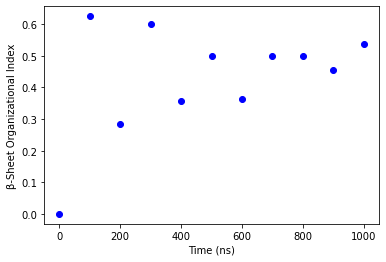

In [20]:
a.plot_contacts()

In [29]:
trj_prod = morphoscanner.trajectory.trajectory(prod_gro, (prod_xtc, prod1_xtc))

In your trajectory there are 5013 frames.

Length: 108, Peptides: 27


In [30]:
trj_prod.explore()

Exploration of frame 0 done.



In [31]:
trj_prod.compose_database(500) 

100%|██████████| 10/10 [00:00<00:00, 14.61it/s]


In [32]:
trj_prod.analyze_inLoop()

processing started...
Two nearby atoms of different peptides are contacting if the distance is lower than: tensor(5.0389) Angstrom
Analyzing frame n°  0
Time to compute distance is:  0.27554641300230287


0it [00:00, ?it/s]


Time to denoise:  6.314301746002457
Finished analysis of frame n° 0
Time needed to analyze frame 0 was 6.736742 seconds
Analyzing frame n°  500
Time to compute distance is:  0.280143500000122


100%|██████████| 6/6 [00:00<00:00, 9686.61it/s]


Time to denoise:  6.921486589999404
Finished analysis of frame n° 500
Time needed to analyze frame 500 was 7.208874 seconds
Analyzing frame n°  1000
Time to compute distance is:  0.28620601700094994


100%|██████████| 6/6 [00:00<00:00, 13515.48it/s]


Time to denoise:  7.173821573000168
Finished analysis of frame n° 1000
Time needed to analyze frame 1000 was 7.466402 seconds
Analyzing frame n°  1500
Time to compute distance is:  0.26452788800088456


100%|██████████| 6/6 [00:00<00:00, 10159.80it/s]


Time to denoise:  6.686518492999312
Finished analysis of frame n° 1500
Time needed to analyze frame 1500 was 6.956883 seconds
Analyzing frame n°  2000
Time to compute distance is:  0.2497931020006945


100%|██████████| 6/6 [00:00<00:00, 10309.64it/s]


Time to denoise:  6.752584794998256
Finished analysis of frame n° 2000
Time needed to analyze frame 2000 was 7.011582 seconds
Analyzing frame n°  2500
Time to compute distance is:  0.2469866009996622


100%|██████████| 8/8 [00:00<00:00, 13362.98it/s]


Time to denoise:  6.827545333999296
Finished analysis of frame n° 2500
Time needed to analyze frame 2500 was 7.082399 seconds
Analyzing frame n°  3000
Time to compute distance is:  0.245570167000551


100%|██████████| 9/9 [00:00<00:00, 12557.80it/s]


Time to denoise:  6.884216766000463
Finished analysis of frame n° 3000
Time needed to analyze frame 3000 was 7.137355 seconds
Analyzing frame n°  3500
Time to compute distance is:  0.24972950700248475


100%|██████████| 10/10 [00:00<00:00, 42069.25it/s]


Time to denoise:  7.507890584998677
Finished analysis of frame n° 3500
Time needed to analyze frame 3500 was 7.766676 seconds
Analyzing frame n°  4000
Time to compute distance is:  0.2646034919998783


100%|██████████| 9/9 [00:00<00:00, 12914.38it/s]


Time to denoise:  7.9336433890021
Finished analysis of frame n° 4000
Time needed to analyze frame 4000 was 8.209235 seconds
Analyzing frame n°  4500
Time to compute distance is:  0.279695166998863


100%|██████████| 10/10 [00:00<00:00, 20272.13it/s]


Time to denoise:  8.111117782998917
Finished analysis of frame n° 4500
Time needed to analyze frame 4500 was 8.401778 seconds
Analyzing frame n°  5000
Time to compute distance is:  0.27480818099866156


100%|██████████| 8/8 [00:00<00:00, 11409.19it/s]

Time to denoise:  7.965458677997958
Finished analysis of frame n° 5000
Time needed to analyze frame 5000 was 8.249900 seconds
Total time to analyze dataset was 82.228651 seconds


In [33]:
trj_prod.get_data()

In [34]:
trj_prod.get_database()

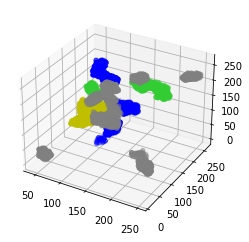

In [36]:
trj_prod.plot_frame_aggregate(2500)

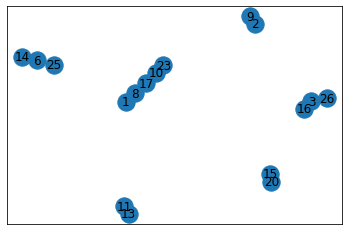

In [38]:
trj_prod.plot_graph(2500)

In [41]:
trj_prod.plot3d_parallel()

In [44]:
trj_mix = morphoscanner.trajectory.trajectory(trj_gro, trj_xtc)

In your trajectory there are 151 frames.

Length: 96, Peptides: 10
Length: 12, Peptides: 20


In [46]:
trj_mix.explore()

Exploration of frame 0 done.



In [47]:
trj_mix.compose_database(10)

100%|██████████| 15/15 [00:00<00:00, 16.69it/s]


In [48]:
trj_mix.analyze_inLoop()

processing started...
Two nearby atoms of different peptides are contacting if the distance is lower than: tensor(5.1339) Angstrom
Analyzing frame n°  0
Time to compute distance is:  0.12133265499869594


0it [00:00, ?it/s]


Time to denoise:  0.6962675980030326
Finished analysis of frame n° 0
Time needed to analyze frame 0 was 0.899744 seconds
Analyzing frame n°  10
Time to compute distance is:  0.10319386599803693


100%|██████████| 5/5 [00:00<00:00, 12550.28it/s]


Time to denoise:  0.8540258259999973
Finished analysis of frame n° 10
Time needed to analyze frame 10 was 0.963740 seconds
Analyzing frame n°  20
Time to compute distance is:  0.12488215399935143


100%|██████████| 9/9 [00:00<00:00, 43092.16it/s]


Time to denoise:  0.8677820169978077
Finished analysis of frame n° 20
Time needed to analyze frame 20 was 1.000662 seconds
Analyzing frame n°  30
Time to compute distance is:  0.12114695600030245


100%|██████████| 9/9 [00:00<00:00, 17387.72it/s]


Time to denoise:  0.9836409819981782
Finished analysis of frame n° 30
Time needed to analyze frame 30 was 1.113830 seconds
Analyzing frame n°  40
Time to compute distance is:  0.12314540000079433


100%|██████████| 12/12 [00:00<00:00, 30954.27it/s]


Time to denoise:  1.006487417002063
Finished analysis of frame n° 40
Time needed to analyze frame 40 was 1.141355 seconds
Analyzing frame n°  50
Time to compute distance is:  0.12156557299749693


100%|██████████| 13/13 [00:00<00:00, 25092.48it/s]


Time to denoise:  1.0222609789998387
Finished analysis of frame n° 50
Time needed to analyze frame 50 was 1.156153 seconds
Analyzing frame n°  60
Time to compute distance is:  0.10078512499967474


100%|██████████| 11/11 [00:00<00:00, 28047.02it/s]


Time to denoise:  1.1139517509982397
Finished analysis of frame n° 60
Time needed to analyze frame 60 was 1.226801 seconds
Analyzing frame n°  70
Time to compute distance is:  0.10228519800148206


100%|██████████| 13/13 [00:00<00:00, 23810.46it/s]


Time to denoise:  1.0577417149979738
Finished analysis of frame n° 70
Time needed to analyze frame 70 was 1.172671 seconds
Analyzing frame n°  80
Time to compute distance is:  0.10066681899843388


100%|██████████| 12/12 [00:00<00:00, 22826.14it/s]


Time to denoise:  1.0530069910018938
Finished analysis of frame n° 80
Time needed to analyze frame 80 was 1.164985 seconds
Analyzing frame n°  90
Time to compute distance is:  0.1014443370004301


100%|██████████| 12/12 [00:00<00:00, 22702.59it/s]


Time to denoise:  1.0841597969993018
Finished analysis of frame n° 90
Time needed to analyze frame 90 was 1.197635 seconds
Analyzing frame n°  100
Time to compute distance is:  0.10261979800270637


100%|██████████| 12/12 [00:00<00:00, 22909.26it/s]


Time to denoise:  1.0720715860006749
Finished analysis of frame n° 100
Time needed to analyze frame 100 was 1.188309 seconds
Analyzing frame n°  110
Time to compute distance is:  0.10066738100067596


100%|██████████| 9/9 [00:00<00:00, 18405.04it/s]


Time to denoise:  1.0498428940009035
Finished analysis of frame n° 110
Time needed to analyze frame 110 was 1.160603 seconds
Analyzing frame n°  120
Time to compute distance is:  0.101736616998096


100%|██████████| 11/11 [00:00<00:00, 16801.65it/s]


Time to denoise:  1.1111474260032992
Finished analysis of frame n° 120
Time needed to analyze frame 120 was 1.223320 seconds
Analyzing frame n°  130
Time to compute distance is:  0.1012073079982656


100%|██████████| 11/11 [00:00<00:00, 21949.26it/s]


Time to denoise:  1.0966120579978451
Finished analysis of frame n° 130
Time needed to analyze frame 130 was 1.208369 seconds
Analyzing frame n°  140
Time to compute distance is:  0.10299672299879603


100%|██████████| 10/10 [00:00<00:00, 14985.01it/s]


Time to denoise:  1.1578029629999946
Finished analysis of frame n° 140
Time needed to analyze frame 140 was 1.278843 seconds
Analyzing frame n°  150
Time to compute distance is:  0.10336540400021477


100%|██████████| 12/12 [00:00<00:00, 21183.35it/s]

Time to denoise:  1.1137868129990238
Finished analysis of frame n° 150
Time needed to analyze frame 150 was 1.232886 seconds
Total time to analyze dataset was 18.330488 seconds


In [49]:
trj_mix.get_data()

In [50]:
trj_mix.get_database()

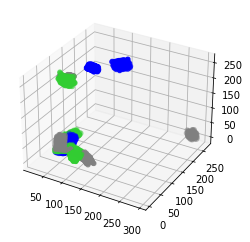

In [56]:
trj_mix.plot_frame_aggregate(150)

In [55]:
trj_mix.plot3d_antiparallel_negative()